In [1]:
import pandas as pd

file_path = "E:/My Folder/UTD/Maven Analytics/Python/Electricity Project/powerconsumption.csv"

df = pd.read_csv(file_path, usecols = ['Datetime','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'], parse_dates = ['Datetime'])

df.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


In [3]:
df['total_consumption'] = df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3']

In [4]:
df.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627


In [5]:
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek

In [6]:
df.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


In [7]:
df1 = df.copy()
df1.set_index('Datetime', inplace=True)

In [8]:
resampled_df = df1.resample('H')['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'].mean()

print(resampled_df)

                     PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                              
2017-01-01 00:00:00            29197.974683            18026.747720   
2017-01-01 01:00:00            24657.215190            16078.419453   
2017-01-01 02:00:00            22083.037973            14330.699088   
2017-01-01 03:00:00            20811.139240            13219.452887   
2017-01-01 04:00:00            20475.949367            12921.580547   
...                                     ...                     ...   
2017-12-30 19:00:00            37513.814957            32497.698680   
2017-12-30 20:00:00            37008.871988            32020.251610   
2017-12-30 21:00:00            35358.174905            30757.901197   
2017-12-30 22:00:00            33993.409380            28477.447070   
2017-12-30 23:00:00            30107.984788            25713.409022   

                     PowerConsumption_Zone3  
Datetime                      

In [9]:
filtered_df = resampled_df.loc['2017-01']
filtered_df

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433
...,...,...,...
2017-01-31 19:00:00,42843.544303,25438.297875,25731.084337
2017-01-31 20:00:00,43023.797470,25429.787233,26003.855422
2017-01-31 21:00:00,41560.506330,25259.574468,25527.710845


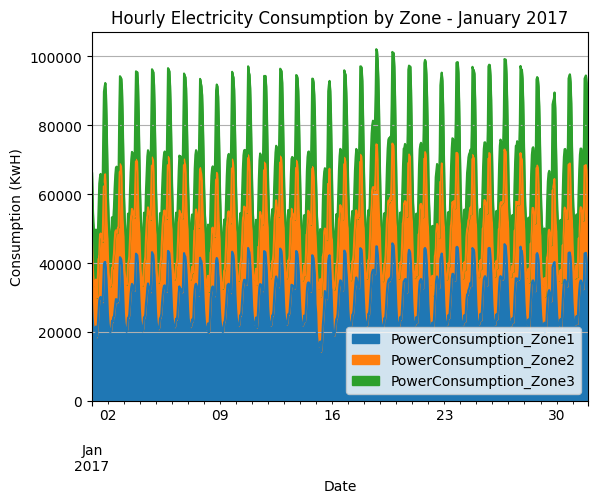

In [10]:
import matplotlib.pyplot as plt
ax = filtered_df.plot.area()

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Consumption (KwH)')
ax.set_title('Hourly Electricity Consumption by Zone - January 2017')

# Show plot
ax.grid(True)
plt.show()

In [11]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday']
df['day_name'] = df['Datetime'].dt.day_name()
df['day_name'] = pd.Categorical(df['day_name'], categories=day_of_week, ordered=True)

In [12]:
pivot = pd.pivot_table(
    df,
    values=['total_consumption'],      # Columns to aggregate
    index=['day_name'],             # Columns to use as rows
    columns=['hour'],                  # Columns to use as columns
    aggfunc='mean',                    # Aggregation function
    fill_value=0                       # Fill missing values with 0
)

# Display the pivot table
print(pivot)

          total_consumption                                            \
hour                     0             1             2             3    
day_name                                                                
Monday         67817.926234  61755.422717  58647.360270  56399.125350   
Tuesday        67935.356547  61868.544847  58801.200586  56642.907327   
Wednesday      68239.842528  62022.724317  58798.761412  56626.703787   
Thursday       68293.632675  62187.544469  59063.328906  56958.133058   
Friday         68959.251459  62533.960861  59152.040758  56825.429786   
Saturday       68991.576226  62628.416936  59321.825090  56745.339022   
Sunday         69728.136464  63113.302575  59243.071267  56207.553656   

                                                                   \
hour                 4             5             6             7    
day_name                                                            
Monday     54823.472531  51680.112788  50810.531813  52647.477

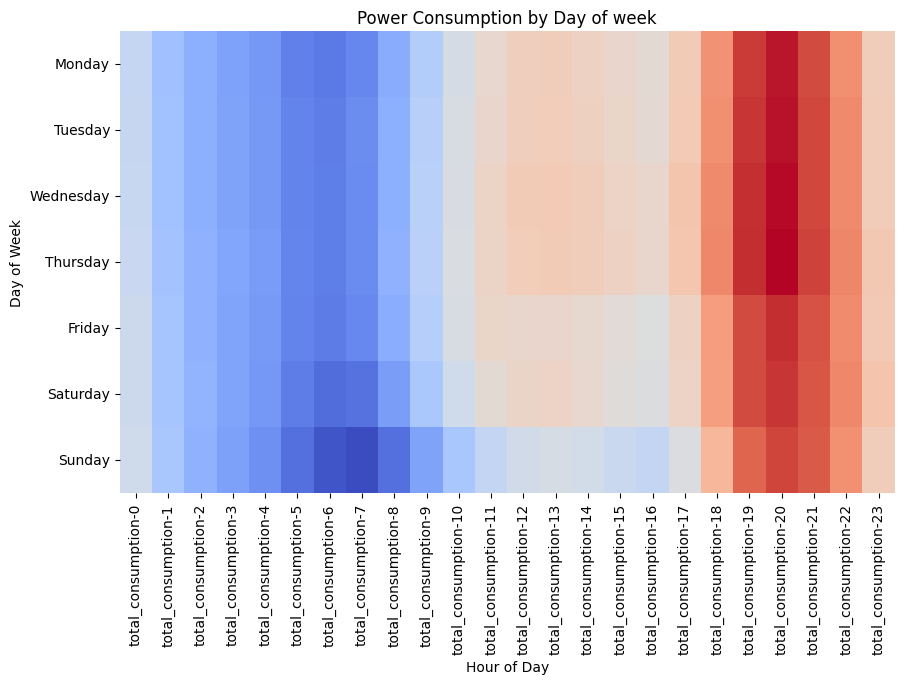

In [13]:
import seaborn as sns

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm', cbar=False)  # Using 'coolwarm' colormap and removing color bar

# Customize the plot
plt.title('Power Consumption by Day of week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Show plot
plt.show()